In [2]:
import pandas as pd
from arff2pandas import  a2p
import pickle
import numpy as np

In [3]:
class loguni():
    def __init__(self, low, high, base = 10):
        self.low = low
        self.high = high
        self.base = base
        
    def rvs(self, size = 1, random_state = None):
        #def rvs(self, num = 1, random_state = None):
        temp = np.power(self.base, np.random.uniform(self.low, self.high, size))
        #res = self.sample(num)
        res = temp
        #res = res[res>=0]
        res = res.reshape(-1,1)

        return res

In [4]:
# Read data
with open('results__2000__svc__predictive_accuracy.arff') as f:
    df = a2p.load(f)
    #print(ds)
    

# Rename all the columns without the @ thing
df = df.rename(columns={col: col.split('@')[0] for col in df.columns})


# Sorting all rows by first task id and then performance for each task
df = df.sort_values(by = ['task_id','predictive_accuracy'], ascending=False)


# Casting task_id to type int
df['task_id'] = df['task_id'].astype('int64')

task_ids = list(df.task_id.unique())


In [5]:
# Unpickling example

results = []
for task_no in task_ids:
    no = str(task_no)
    fil_name = "kde_v_uni_" + no + ".pickle" 
    pickle_off = open(fil_name,"rb")
    emp = pickle.load(pickle_off)
    results.append(emp)

In [38]:
#index diff = k_i -u_i and perf diff = k_s - u_s
indices = []
for item in results:
    #print (item['index_diff'])
    indices.append(item['index_diff'])

In [39]:
perf = []
for item in results:
    #print (item['perf_diff'])
    perf.append(item['perf_diff'])

In [42]:
perf = pd.DataFrame(perf)
indices = pd.DataFrame(indices)

In [55]:
np.mean(indices["Difference in Index of best test accuracy (kernel - uniform)"].values)

-0.5238095238095238

In [56]:
indices

,0,Difference in Index of best test accuracy (kernel - uniform)
0,-13,-13
1,-10,-10
2,5,5
3,5,5
4,0,0
5,-14,-14
6,-1,-1
7,-16,-16
8,0,0
9,2,2


In [43]:
np.mean(indices)

0   -0.52381
dtype: float64

In [44]:
np.mean(indices < 0)

0    0.428571
dtype: float64

In [45]:
np.mean(PERF > 0)

0    0.52381
dtype: float64

In [46]:
np.mean(PERF.values)

0.0015663823752816396

In [47]:
indices.columns

RangeIndex(start=0, stop=1, step=1)

In [48]:
indices["Difference in Index of best test accuracy (kernel - uniform)"] = indices.values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aab24daa080>]],
      dtype=object)

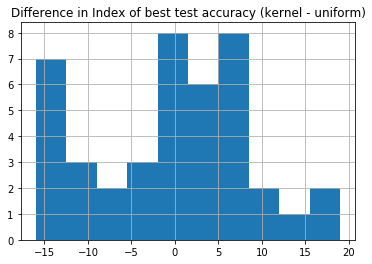

In [51]:
%matplotlib inline
indices.hist(column="Difference in Index of best test accuracy (kernel - uniform)")

In [52]:
perf["Difference in performance (kernel - uniform)"] = perf.values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aab24ab9470>]],
      dtype=object)

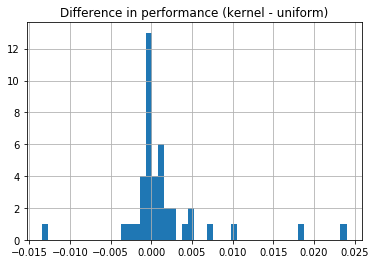

In [53]:
perf.hist(bins=50, column=["Difference in performance (kernel - uniform)"])

In [21]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import numpy as np

def plot_hist(x, title = '', 
              xlabel = '', 
              y_label = '', 
              start = None,
              size = None, 
              end = None):
    trace1 = go.Histogram(
        x=x,
        histnorm='percent',
        name='control',
        xbins=dict(
            start=start,
            end=end,
            size=size
        ),
        marker=dict(
            color='green',
        ),
        opacity=0.75
    )
    
    data = [trace1]

    layout = go.Layout(
        title=title,
        xaxis=dict(
            title=xlabel
        ),
        yaxis=dict(
            title=y_label
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='styled histogram')

In [22]:
plot_hist(x = PERF.values, start=-1, end = 1, size = 0.000001 )

In [15]:
PERF.values

array([[ 0.00000000e+00],
       [-1.48809524e-03],
       [ 5.01882058e-03],
       [ 1.18906064e-03],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.40548138e-03],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 8.30909846e-04],
       [ 2.43683468e-03],
       [ 2.02020202e-03],
       [ 2.65111347e-04],
       [ 0.00000000e+00],
       [-1.55520995e-04],
       [-1.34180791e-02],
       [ 8.00000000e-04],
       [ 7.09219858e-03],
       [ 0.00000000e+00],
       [ 5.01567398e-03],
       [-1.30406433e-03],
       [ 4.39238653e-03],
       [ 1.30208333e-03],
       [-3.46320346e-03],
       [-9.09752547e-04],
       [ 2.00000000e-03],
       [ 0.00000000e+00],
       [ 1.42348754e-03],
       [ 2.58493353e-03],
       [-1.35777325e-03],
       [ 1.00000000e-03],
       [ 1.04166667e-02],
       [ 5.00000000e-04],
       [ 1.50000000e-03],
       [-5.00000000e-04],
       [-2.86123033e-03],
       [ 1.85000000e-02],
       [ 0.0